# **Background**
> PT Home Credit Indonesia is a finance company that provides financing services for customers who shop online or offline. PT Home Credit Indonesia also provides financing for customers to meet their financial needs. Data Scientist was asked to make a predictive model of whether a customer has the potential to experience payment difficulties, as a recommendation whether later the loan can be accepted or not.

# **Dataset Description**
> 
1.   Given dataset : ‘**application_train**’ and ‘**application_test**’. 
2.   **SK_ID_CURR** is unique customer loan number and **TARGET** is the target.

# **Steps of completion**
> Create a machine learning model using python to predict whether a customer is having payment difficulties (1) or not (0). Here are the steps to do it:
1. Data pre-processing [Handling duplicate data, missing data, outliers, imbalanced class or others]
2. Training classification machine learning using at least 1 algorithm [Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier].
3. Evaluate model performance using confusion matrix and explain the model precision and recall
4. Create prediction result csv using from ‘application_test’ data






# **1. Import Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [ ]:
#Load dataset
aptr = pd.read_csv('application_train.csv')
aptest = pd.read_csv('application_test.csv')

In [ ]:
print(aptr.head())
print(aptest.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [ ]:
print(aptr.info())
print(aptest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


# **2. Data Pre-Processing**

**2.1 Handling Duplicates Data**

In this section, we check whether there are duplicate data. Duplicate data can affect test results and predictions.

In [ ]:
#check duplicate data
print(aptr.duplicated().sum())
print(aptest.duplicated().sum())

0
0


Based on the results, no duplicate data were found. Therefore, we can move on to the next step.

**2.2 Checking Missing Values**

The next step is to check and handle for missing data. This is important because if it has many missing values, it will reduce model performance and also some machine learning algorithms cannot process data with missing values.

In [ ]:
#check missing values
print('Is there any missing values in application train?')
print(aptr.isna().values.any())
print('Is there any missing values in application test?')
print(aptest.isna().values.any())

#check total missing values
print('Total missing value of application train')
print(aptr.isna().sum())
print('Total missing value of application test')
print(aptest.isna().sum())

Is there any missing values in application train?
True
Is there any missing values in application test?
True
Total missing value of application train
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
Total missing value of application test
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Len

Based on the results, there are many missing data, even one column is missing more than 50% of the data. Therefore, we will eliminate unnecessary columns and columns that have a missing value more than 50% of the data.

**2.3 Drop Unnecessary Columns**

In [ ]:
#drop unnecessary column of application train
aptr.drop(aptr.columns[[11,13,16,23,24,26,27,30,34,35,36,38,39,40,45,46,47,48,49,50,51,52,53,55,56,57,59,60,61,62,63,64,65,66,67,69,70,71,73,74,75,76,77,78,79,80,81,83,84,85,86,88,89,90,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]], axis=1, inplace=True)
#drop unnecessary column application test
aptest.drop(aptest.columns[[10,12,15,22,23,25,26,29,33,34,35,37,38,39,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,61,62,63,64,65,66,68,69,70,72,73,74,75,76,77,78,79,80,82,83,84,85,87,88,89,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119]], axis=1, inplace=True)

In [ ]:
print('Total missing value of application train')
print(aptr.isna().sum())
print('Total missing value of application test')
print(aptest.isna().sum())

Total missing value of application train
SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_CONT_MOBILE                    0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR

In [ ]:
print(aptr.info())
print(aptest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

**2.4 Handling missing value**

In [ ]:
#drop columns with >50% missing values of app train
aptr.drop(aptr.columns[[18,27,30,31,32,33,34,35,36]], axis=1, inplace=True)
#drop columns with >50% missing values of app test
aptest.drop(aptest.columns[[17,26,29,30,31,32,33,34,35]], axis=1, inplace=True)

In [ ]:
#re-check total missing values
print(aptr.isna().sum())
print(aptest.isna().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
EXT_SOURCE_2                     660
E

In [ ]:
#handling missing value in columns with numeric type
aptr=aptr.fillna(0)
aptest=aptest.fillna(0)

**2.5 Typos Checking**

In [ ]:
#typos check in columns with object type in app train
fe =['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START']
for col in fe:
  print(f'value counts of column {col}')
  print(aptr[col].value_counts())
  print('---'*12, '\n')

value counts of column NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------------ 

value counts of column CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
------------------------------------ 

value counts of column FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
------------------------------------ 

value counts of column FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------------ 

value counts of column NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------------ 

value counts of column NAME_FAMILY_STATUS
Marr

In [ ]:
#typos check in columns with object type in app test
c =['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START']
for col2 in c:
  print(f'value counts of column {col2}')
  print(aptest[col2].value_counts())
  print('---'*12, '\n')

value counts of column NAME_CONTRACT_TYPE
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------------ 

value counts of column CODE_GENDER
F    32678
M    16066
Name: CODE_GENDER, dtype: int64
------------------------------------ 

value counts of column FLAG_OWN_CAR
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64
------------------------------------ 

value counts of column FLAG_OWN_REALTY
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------------ 

value counts of column NAME_INCOME_TYPE
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------------ 

value counts of column NAME_FAMILY_STATUS
Married                 32283
Single / not married     7036
Civil ma

In [ ]:
#drop 'XNA' in  column gender
aptr=aptr[aptr.CODE_GENDER != 'XNA']

In [ ]:
#convert days into positive number in app train
aptr['DAYS_BIRTH']=aptr['DAYS_BIRTH'].abs()
aptr['DAYS_EMPLOYED']=aptr['DAYS_EMPLOYED'].abs()
aptr['DAYS_REGISTRATION']=aptr['DAYS_REGISTRATION'].abs()
aptr['DAYS_ID_PUBLISH']=aptr['DAYS_ID_PUBLISH'].abs()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#convert days into positive number in app test
aptest['DAYS_BIRTH']=aptest['DAYS_BIRTH'].abs()
aptest['DAYS_EMPLOYED']=aptest['DAYS_EMPLOYED'].abs()
aptest['DAYS_REGISTRATION']=aptest['DAYS_REGISTRATION'].abs()
aptest['DAYS_ID_PUBLISH']=aptest['DAYS_ID_PUBLISH'].abs()

In [ ]:
#re-check missing values
print('Is there any missing values in application train?')
print(aptr.isna().values.any())
print('Is there any missing values in application test?')
print(aptest.isna().values.any())

Is there any missing values in application train?
False
Is there any missing values in application test?
False


Missing values has been resolved

**2.6 Handling Outliers**

In [ ]:
#Remove Outliers for numerical columns in app train
print(f'Jumlah baris sebelum memfilter outlier: {len(aptr)}')

for col in aptr.columns[[7,8,9,10,26,27,28,29,30,31,32]]:
  Q1 = aptr[col].quantile(0.25)
  Q3 = aptr[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  aptr = aptr[(aptr[col] >= low_limit) & (aptr[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(aptr)}')

Jumlah baris sebelum memfilter outlier: 307507
Jumlah baris setelah memfilter outlier: 203358


In [ ]:
#Remove Outliers for numerical columns in app test
print(f'Jumlah baris sebelum memfilter outlier: {len(aptest)}')

for col2 in aptest.columns[[6,7,8,9,25,26,27,28,29,30,31]]:
  Q1 = aptr[col2].quantile(0.25)
  Q3 = aptr[col2].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  aptest = aptest[(aptest[col2] >= low_limit) & (aptest[col2] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(aptest)}')

Jumlah baris sebelum memfilter outlier: 48744
Jumlah baris setelah memfilter outlier: 29085


In [ ]:
print(aptr.info())
print(aptest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203358 entries, 1 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   203358 non-null  int64  
 1   TARGET                       203358 non-null  int64  
 2   NAME_CONTRACT_TYPE           203358 non-null  object 
 3   CODE_GENDER                  203358 non-null  object 
 4   FLAG_OWN_CAR                 203358 non-null  object 
 5   FLAG_OWN_REALTY              203358 non-null  object 
 6   CNT_CHILDREN                 203358 non-null  int64  
 7   AMT_INCOME_TOTAL             203358 non-null  float64
 8   AMT_CREDIT                   203358 non-null  float64
 9   AMT_ANNUITY                  203358 non-null  float64
 10  AMT_GOODS_PRICE              203358 non-null  float64
 11  NAME_INCOME_TYPE             203358 non-null  object 
 12  NAME_FAMILY_STATUS           203358 non-null  object 
 13 

**2.7 Feature Encoding**

In order to be implemented in an ML model, the data must be in numeric form. Therefore, data with type string will be converted to numeric.

Encoding strategy
*   Label encoding: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR,FLAG_OWN_REALTY 
*   One hot encoding:NAME_INCOME_TYPE, NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
*   Drop because there are too many distinct values: OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START

In [ ]:
#drop columns OCCUPATION_TYPE and WEEKDAY_APPR_PROCESS_START in app train
aptr=aptr.drop(columns='OCCUPATION_TYPE')
aptr=aptr.drop(columns='WEEKDAY_APPR_PROCESS_START')

#drop columns OCCUPATION_TYPE and WEEKDAY_APPR_PROCESS_START app test
aptest=aptest.drop(columns='OCCUPATION_TYPE')
aptest=aptest.drop(columns='WEEKDAY_APPR_PROCESS_START')

In [ ]:
#Label encoding
mapping_nct = {
    'Cash loans':0,
    'Revolving loans': 1
}

mapping_cd= {
    'F' : 0,
    'M' : 1
}

mapping_foc={
    'N':0,
    'Y':1
}

mapping_for={
    'N':0,
    'Y':1
}

#app train label encoder
aptr['NAME_CONTRACT_TYPE'] = aptr['NAME_CONTRACT_TYPE'].map(mapping_nct)
aptr['CODE_GENDER'] = aptr['CODE_GENDER'].map(mapping_cd)
aptr['FLAG_OWN_CAR'] = aptr['FLAG_OWN_CAR'].map(mapping_foc)
aptr['FLAG_OWN_REALTY'] = aptr['FLAG_OWN_REALTY'].map(mapping_for)

#app test label encoder
aptest['NAME_CONTRACT_TYPE'] = aptest['NAME_CONTRACT_TYPE'].map(mapping_nct)
aptest['CODE_GENDER'] = aptest['CODE_GENDER'].map(mapping_cd)
aptest['FLAG_OWN_CAR'] = aptest['FLAG_OWN_CAR'].map(mapping_foc)
aptest['FLAG_OWN_REALTY'] = aptest['FLAG_OWN_REALTY'].map(mapping_for)

In [ ]:
# One hot encoder app train
# WARNING: run code ini sekali saja
for ohe in ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']:
    onehots = pd.get_dummies(aptr[ohe], prefix=ohe)
    aptr = aptr.join(onehots)

In [ ]:
# One hot encoder app test
# WARNING: run code ini sekali saja
for ohe in ['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']:
    onehots = pd.get_dummies(aptest[ohe], prefix=ohe)
    aptest = aptest.join(onehots)

In [ ]:
# drop original columns before one hot encoding app train
aptr = aptr.drop(columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

# drop original columns before one hot encoding app test
aptest = aptest.drop(columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [ ]:
print(aptr.info())
print(aptest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203358 entries, 1 to 307510
Data columns (total 48 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               203358 non-null  int64  
 1   TARGET                                   203358 non-null  int64  
 2   NAME_CONTRACT_TYPE                       203358 non-null  int64  
 3   CODE_GENDER                              203358 non-null  int64  
 4   FLAG_OWN_CAR                             203358 non-null  int64  
 5   FLAG_OWN_REALTY                          203358 non-null  int64  
 6   CNT_CHILDREN                             203358 non-null  int64  
 7   AMT_INCOME_TOTAL                         203358 non-null  float64
 8   AMT_CREDIT                               203358 non-null  float64
 9   AMT_ANNUITY                              203358 non-null  float64
 10  AMT_GOODS_PRICE                 

In [ ]:
#save clean data as csv
aptr.to_csv('application_train_clean.csv')
aptest.to_csv('application_test_clean.csv')

# **3. Modelling**

**3.1 Find Features and Target prediction**

Before modeling, good features will be determined to predict the target using a correlation matrix heatmap

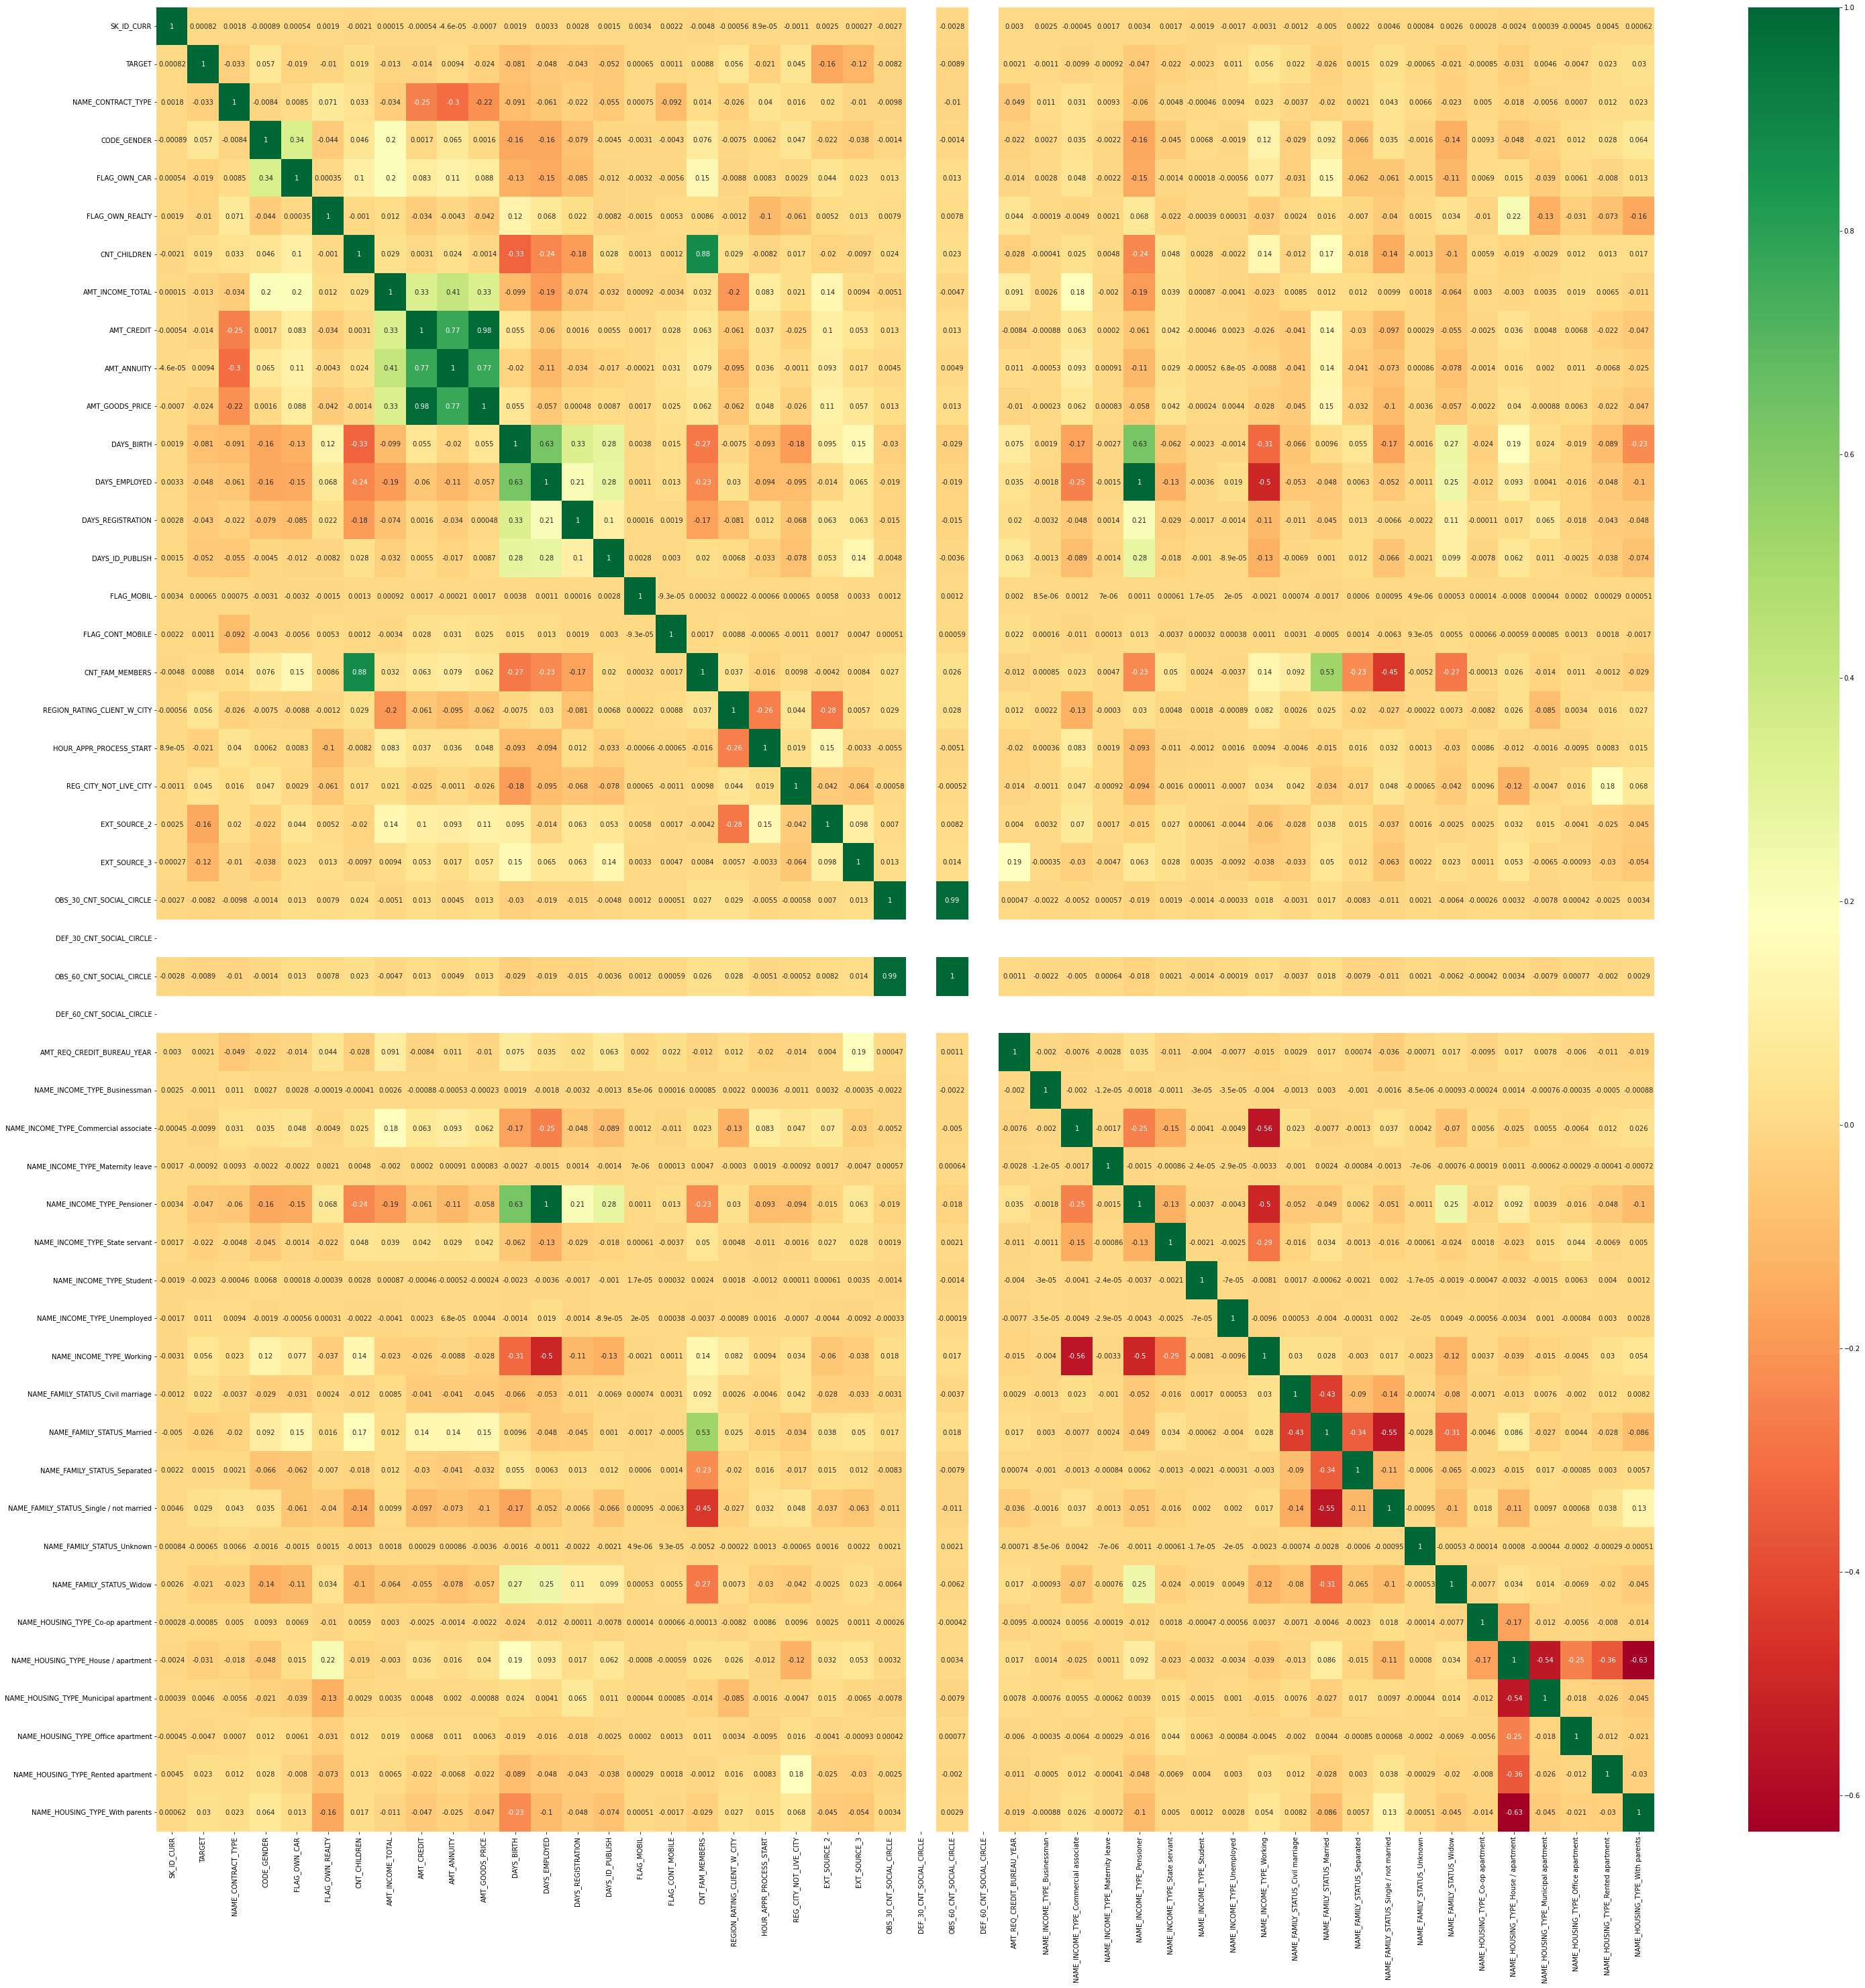

In [ ]:
#find good features using correlation matrix heatmap
#the target prediction is target
X = aptr.iloc[:, 0:47]
Y = aptr['TARGET']

corrmat = aptr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
g = sns.heatmap(aptr[top_corr_features].corr(), annot=True, cmap="RdYlGn")

**3.2 Feature Selection**

The selected feature is a feature that does not show a red color category (very low correlation) and is not empty

In [ ]:
aptr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203358 entries, 1 to 307510
Data columns (total 48 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               203358 non-null  int64  
 1   TARGET                                   203358 non-null  int64  
 2   NAME_CONTRACT_TYPE                       203358 non-null  int64  
 3   CODE_GENDER                              203358 non-null  int64  
 4   FLAG_OWN_CAR                             203358 non-null  int64  
 5   FLAG_OWN_REALTY                          203358 non-null  int64  
 6   CNT_CHILDREN                             203358 non-null  int64  
 7   AMT_INCOME_TOTAL                         203358 non-null  float64
 8   AMT_CREDIT                               203358 non-null  float64
 9   AMT_ANNUITY                              203358 non-null  float64
 10  AMT_GOODS_PRICE                 

Then, the data type of the selected feature will be equated with integer

In [ ]:
#feature selection
newDF = aptr[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_CONT_MOBILE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','NAME_INCOME_TYPE_Commercial associate','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_INCOME_TYPE_Student','NAME_INCOME_TYPE_Unemployed','NAME_INCOME_TYPE_Working','NAME_FAMILY_STATUS_Civil marriage','NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Separated','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_Co-op apartment','NAME_HOUSING_TYPE_House / apartment','NAME_HOUSING_TYPE_Municipal apartment','NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents']]

newDF = newDF.fillna(0)

#convert float to int
newDF.AMT_INCOME_TOTAL = newDF.AMT_INCOME_TOTAL.astype(int)
newDF.AMT_CREDIT = newDF.AMT_CREDIT.astype(int)
newDF.AMT_ANNUITY = newDF.AMT_ANNUITY.astype(int)
newDF.AMT_GOODS_PRICE = newDF.AMT_GOODS_PRICE.astype(int)
newDF.DAYS_REGISTRATION = newDF.DAYS_REGISTRATION.astype(int)
newDF.CNT_FAM_MEMBERS = newDF.CNT_FAM_MEMBERS.astype(int)
newDF.EXT_SOURCE_2 = newDF.EXT_SOURCE_2.astype(int)
newDF.EXT_SOURCE_3 = newDF.EXT_SOURCE_3.astype(int)
newDF.OBS_30_CNT_SOCIAL_CIRCLE = newDF.OBS_30_CNT_SOCIAL_CIRCLE.astype(int)
newDF.OBS_60_CNT_SOCIAL_CIRCLE = newDF.OBS_60_CNT_SOCIAL_CIRCLE.astype(int)
newDF.AMT_REQ_CREDIT_BUREAU_YEAR = newDF.AMT_REQ_CREDIT_BUREAU_YEAR.astype(int)
#check new dataset info
newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203358 entries, 1 to 307510
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   TARGET                                   203358 non-null  int64
 1   NAME_CONTRACT_TYPE                       203358 non-null  int64
 2   CODE_GENDER                              203358 non-null  int64
 3   FLAG_OWN_CAR                             203358 non-null  int64
 4   FLAG_OWN_REALTY                          203358 non-null  int64
 5   CNT_CHILDREN                             203358 non-null  int64
 6   AMT_INCOME_TOTAL                         203358 non-null  int64
 7   AMT_CREDIT                               203358 non-null  int64
 8   AMT_ANNUITY                              203358 non-null  int64
 9   AMT_GOODS_PRICE                          203358 non-null  int64
 10  DAYS_BIRTH                               203358 non-null

**3.3 Training process preparartion**

The '**application_train**' table will be divided into 80% training data and 20% testing data. This testing data will be used to validate the model.

In [ ]:
#prepare the training set
X = newDF
y = newDF['TARGET']

#training process use 80% of data as training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3.4 Logistic Regression Model**

In [ ]:
#Modelling using logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(logreg)

LogisticRegression()


**3.5 Random Forest Classifier Model**

In [ ]:
#Modelling using random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print(rfc)

RandomForestClassifier()


**3.6 Gradient Boosting Classifier Model**

In [ ]:
#Modelling using gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print(gbc)

GradientBoostingClassifier()


# **4. Evaluate Model Performance**

**4.1 Logistic Regression Model**

4.1.1 Prediction of Data training



In [ ]:
#prediction
y_train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.92


In [ ]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    149708
           1       0.00      0.00      0.00     12978

    accuracy                           0.92    162686
   macro avg       0.46      0.50      0.48    162686
weighted avg       0.85      0.92      0.88    162686



4.1.2 Confusion Matrix of Data training

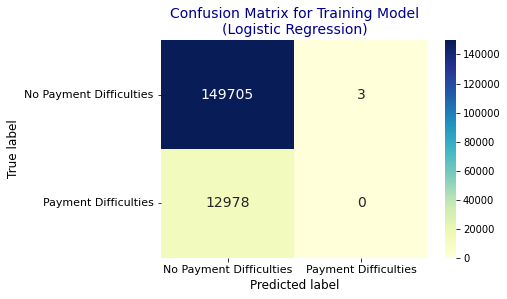

In [ ]:
# Model performance for Data Training using Confusion Matrix (Logistic Regression)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

4.1.3 Prediction of Data Testing

In [ ]:
#prediction
y_test_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [ ]:
#classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     37407
           1       0.00      0.00      0.00      3265

    accuracy                           0.92     40672
   macro avg       0.46      0.50      0.48     40672
weighted avg       0.85      0.92      0.88     40672



4.1.4 Confusion Matrix of Data Testing

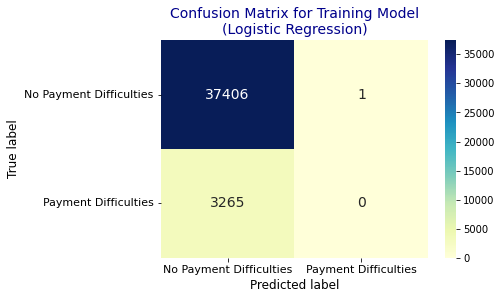

In [ ]:
# Model performance for Data Testing using Confusion Matrix (Logistic Regression)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

**4.2 Random Forest Classifier Model**

4.2.1 Prediction of Data Training

In [ ]:
#prediction
y2_train_pred = rfc.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(rfc.score(X_train, y_train)))
#classification report
print(classification_report(y_train, y2_train_pred))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149708
           1       1.00      1.00      1.00     12978

    accuracy                           1.00    162686
   macro avg       1.00      1.00      1.00    162686
weighted avg       1.00      1.00      1.00    162686



4.2.2 Confusion Matrix of Data Training

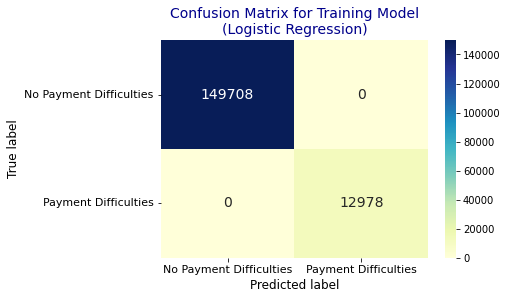

In [ ]:
# Model performance for Data Training using Confusion Matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y2_train_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

4.2.3 Prediction of Data Testing

In [ ]:
#prediction
y2_test_pred = rfc.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(rfc.score(X_test, y_test)))
#classification report
print(classification_report(y_test, y2_test_pred))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37407
           1       1.00      1.00      1.00      3265

    accuracy                           1.00     40672
   macro avg       1.00      1.00      1.00     40672
weighted avg       1.00      1.00      1.00     40672



4.2.4 Confusion Matrix of Data Testing

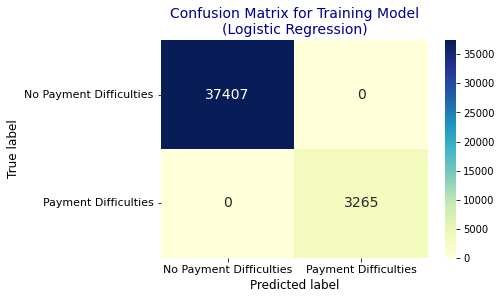

In [ ]:
# Model performance for Data Testing using Confusion Matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y2_test_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

**4.3 Gradient Boosting Classifier Model**

4.3.1 Prediction of Data Training

In [ ]:
#prediction
y3_train_pred = gbc.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(gbc.score(X_train, y_train)))
#classification report
print(classification_report(y_train, y3_train_pred))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149708
           1       1.00      1.00      1.00     12978

    accuracy                           1.00    162686
   macro avg       1.00      1.00      1.00    162686
weighted avg       1.00      1.00      1.00    162686



4.3.2 Confusion Matrix of Data Training

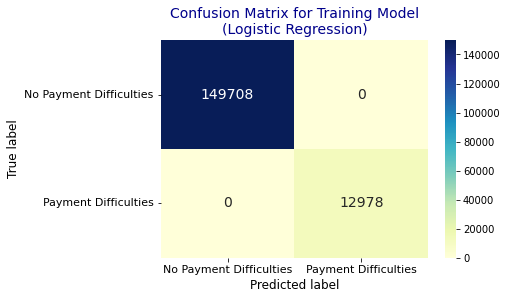

In [ ]:
# Model performance for Data Training using Confusion Matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y3_train_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

4.3.3 Prediction of Data Testing

In [ ]:
#prediction
y3_test_pred = gbc.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(gbc.score(X_test, y_test)))
#classification report
print(classification_report(y_test, y3_test_pred))

Accuracy of logistic regression classifier on train set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37407
           1       1.00      1.00      1.00      3265

    accuracy                           1.00     40672
   macro avg       1.00      1.00      1.00     40672
weighted avg       1.00      1.00      1.00     40672



4.3.4 Confusion Matrix of Data Testing

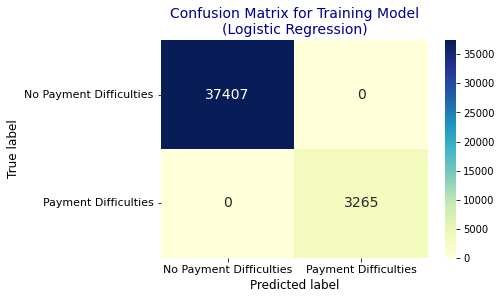

In [ ]:
# Model performance for Data Testing using Confusion Matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y3_test_pred),('No Payment Difficulties','Payment Difficulties'),('No Payment Difficulties','Payment Difficulties'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=11)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=14, color='darkblue')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

# **5. Conclusion**

After several experiments with 3 different models, the best model will be selected. The best model is determined based on the accuracy of the model, because accuracy indicates the level of closeness between the predicted value and the actual value. In addition, the best model is also determined based on the model that produces the smallest percentage difference between the training data and the test data.

Based on the evaluation results, it can be seen that the **random forest classifier**model and **gradient booster classifier** model have high model accuracy and the percentage difference between training data and test data is 0. Therefore, it can be concluded that the random forest classifier and gradient booster classifier models are the best models to predict customers who have potential of payment difficulties.

#**6. Creat Prediction csv**

In [ ]:
aptest=aptest.drop(columns='DEF_30_CNT_SOCIAL_CIRCLE')
aptest=aptest.drop(columns='DEF_60_CNT_SOCIAL_CIRCLE')
aptest=aptest.drop(columns='SK_ID_CURR')

In [ ]:
aptest['TARGET']=0

In [ ]:
y_test = aptest
y_pred = rfc.predict(y_test)
pred_result = pd.DataFrame({'prediction':y_pred})
pred_result.to_csv('Prediction Result1.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
y_test = aptest
y_pred = gbc.predict(y_test)
pred_result = pd.DataFrame({'prediction':y_pred})
pred_result.to_csv('Prediction Result2.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
